Model Evaluation (Precision, Recall, F1 Score)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ==========================
# 📂 Load Dataset
# ==========================
data = pd.read_csv("customer_churn_dataset.csv")

# Display info
print("Initial dataset shape:", data.shape)
print("\nTarget value counts before cleaning:")
print(data["Churn"].value_counts())

# ==========================
# 🧹 Data Cleaning
# ==========================
# Drop duplicates and rows with missing target
data.drop_duplicates(inplace=True)
data.dropna(subset=["Churn"], inplace=True)

# Fill numeric missing values with median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# ==========================
# 🎯 Define Features & Target
# ==========================
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Check target distribution
print("\nTarget distribution after cleaning:")
print(y.value_counts())

# If dataset has only one class, stop early
if y.nunique() < 2:
    raise ValueError("❌ Target column contains only one class. Check your dataset!")

# ==========================
# ✂️ Train/Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==========================
# ⚙️ Scaling (Optional for LR)
# ==========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================
# 🤖 Train Models
# ==========================
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# ==========================
# 🔍 Predictions
# ==========================
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 📊 Evaluation
# ==========================
print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))



Initial dataset shape: (64374, 12)

Target value counts before cleaning:
Churn
0    33881
1    30493
Name: count, dtype: int64

Target distribution after cleaning:
Churn
0    33881
1    30493
Name: count, dtype: int64


C:\Users\SAMI ULLAH\AppData\Local\Temp\ipykernel_12964\3492145085.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\SAMI ULLAH\AppData\Local\Temp\ipykernel_12964\3492145085.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6776
           1       0.86      0.85      0.85      6099

    accuracy                           0.86     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.86      0.86      0.86     12875


=== Random Forest Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875


Confusion Matrix (Random Forest):
[[6774    2]
 [  28 6071]]


Model Metric Comparison Graphs

C:\Users\SAMI ULLAH\AppData\Local\Temp\ipykernel_12964\3947446769.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SAMI ULLAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


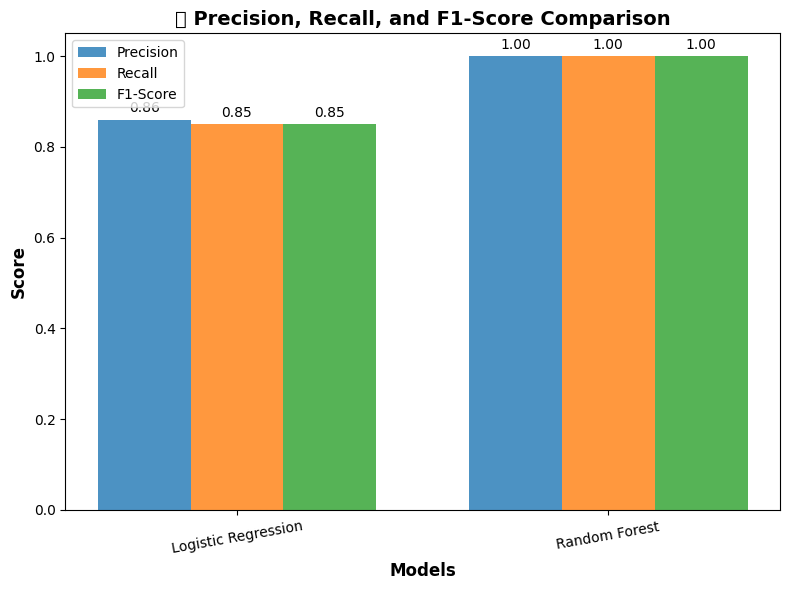

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 📌 Define metrics (from your results)
# ================================
models = ['Logistic Regression', 'Random Forest']

precision = [0.86, 1.00]
recall = [0.85, 1.00]
f1_score = [0.85, 1.00]

# ================================
# 🎨 Bar chart for Precision, Recall, F1-score
# ================================
x = np.arange(len(models))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
rects2 = ax.bar(x, recall, width, label='Recall', alpha=0.8)
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('📊 Precision, Recall, and F1-Score Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=10)
ax.legend()

# Show value on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


Accuracy Comparison Chart

C:\Users\SAMI ULLAH\AppData\Local\Temp\ipykernel_12964\2322722812.py:22: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SAMI ULLAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


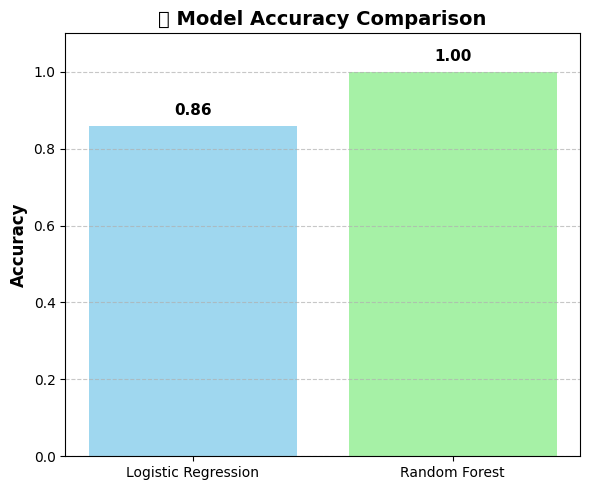

In [6]:
# ================================
# 📊 Accuracy Comparison
# ================================
accuracy = [0.86, 1.00]  # Replace with your actual results if different

plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracy, color=['skyblue', 'lightgreen'], alpha=0.8)

# Add chart details
plt.title('🏁 Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.ylim(0, 1.1)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Clean visual layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
